# Introducción y Antecedentes de la Problemática a Resolver

De acuerdo con el reporte elaborado por OCCMundial, junto con las consultoras GDP y Grupo Azimuth, las principales causas de renuncia están relacionadas con el nivel de desgaste de los trabajadores. Los motivos más relevantes son la falta de valores, el mal ambiente laboral, la falta de reconocimiento, la monotonía y la realización de actividades ajenas a su puesto. Asimismo, el reporte señaló las pocas oportunidades de crecimiento, los problemas de salud mental, el mal liderazgo, la falta de innovación en el negocio y el exceso de trabajo.

Cada vez son más las empresas que toman conciencia sobre la importancia del capital humano y ponen más énfasis en la experiencia del empleado. La retención de empleados es una herramienta que utilizan las empresas como estrategia para evitar que sus trabajadores más eficaces se marchen. Para ello, se puede fomentar un entorno positivo en el trabajo a través de la oferta de beneficios o proporcionando apoyo profesional que resulte atractivo al empleado.

En definitiva, la retención de empleados puede suponer una ganancia de competitividad y productividad en comparación con las empresas que presentan altos niveles de rotación de personal. Estas herramientas te ayudarán a ofrecer una buena experiencia al empleado, retener a los mejores talentos y evitar pérdidas de conocimientos, contactos y rendimiento en tu empresa.

Nuestro objetivo se centra en la exploración de insights significativos y en el desarrollo de modelos predictivos con el propósito de mejorar diversos aspectos fundamentales en las organizaciones. Nos esforzamos por contribuir al avance en áreas cruciales como la gestión de talento, la satisfacción laboral, la promoción de la diversidad y la optimización de la eficiencia operativa. A través de análisis profundos y herramientas predictivas, buscamos ofrecer soluciones que impulsen el crecimiento y el éxito de las organizaciones en el ámbito laboral.

- Fuentes

[1] Forbes Staff. “La 'gran renuncia': 4 de cada 10 mexicanos dejaría su trabajo, según estudio”. Forbes México. Accedido el 3 de diciembre de 2023. [En línea]. Disponible: https://www.forbes.com.mx/la-gran-renuncia-4-de-cada-10-mexicanos-dejaria-su-trabajo-segun-estudio/

[2] A. De Toro. “Estrategias para la Retención de Personal en la empresa”. Revista Escuela de Negocios y Dirección. Accedido el 3 de diciembre de 2023. [En línea]. Disponible: https://www.escueladenegociosydireccion.com/revista/business/estrategias-retencion-personal/-

## Import required libraries

In [ ]:
import pandas as pd
import plotly.express as px

Accedemos a los datos

In [ ]:
data = pd.read_excel("/content/sample_data/bosch_aic_datathon.xlsx")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1403 entries, 0 to 1402
Data columns (total 20 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   Posición                                      1403 non-null   object        
 1   Area                                          1403 non-null   object        
 2   Á.liq.                                        1403 non-null   object        
 3   Grupo de personal                             1403 non-null   object        
 4   CODIGO POSTAL                                 1403 non-null   int64         
 5   Motivo de la RENUNCIA                         1403 non-null   object        
 6   Banda                                         1402 non-null   object        
 7   Baja                                          1403 non-null   datetime64[ns]
 8   ReglaPHT                                      1403 non-null   object

No hay datos duplicados, pero si hay nulos

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isna().sum()

Posición                                          0
Area                                              0
Á.liq.                                            0
Grupo de personal                                 0
CODIGO POSTAL                                     0
Motivo de la RENUNCIA                             0
Banda                                             1
Baja                                              0
ReglaPHT                                          0
Alta                                              0
Años                                              0
Meses                                             0
Antigüedad                                        0
Clave de sexo                                     0
Lugar de nacimiento                               2
Nacionalidad                                      0
Edad del empleado                                 0
¿Cuanto tiempo tiene viviendo en Cd. Juarez?    786
Estado Civil                                     10
Hijos       

In [ ]:
Total_nulos=data.isna().sum().sum()
print("Total de nulos en el DataFrame:", Total_nulos)

Total de nulos en el DataFrame: 799


In [ ]:
data.columns

Index(['Posición', 'Area', 'Á.liq.', 'Grupo de personal', 'CODIGO POSTAL',
       'Motivo de la RENUNCIA', 'Banda', 'Baja', 'ReglaPHT', 'Alta', 'Años',
       'Meses', 'Antigüedad', 'Clave de sexo', 'Lugar de nacimiento',
       'Nacionalidad', 'Edad del empleado',
       '¿Cuanto tiempo tiene viviendo en Cd. Juarez?', 'Estado Civil',
       'Hijos'],
      dtype='object')

Creamos una copia de los datos para eliminar los valores nulos y las columnas de ¿Cuanto tiempo tiene viviendo en Cd. Juarez?, Años y Meses.

In [ ]:
df= data.dropna(how="all")
df.drop(columns=['¿Cuanto tiempo tiene viviendo en Cd. Juarez?','Años','Meses'], inplace=True)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1391 entries, 0 to 1402
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Posición               1391 non-null   object        
 1   Area                   1391 non-null   object        
 2   Á.liq.                 1391 non-null   object        
 3   Grupo de personal      1391 non-null   object        
 4   CODIGO POSTAL          1391 non-null   int64         
 5   Motivo de la RENUNCIA  1391 non-null   object        
 6   Banda                  1391 non-null   object        
 7   Baja                   1391 non-null   datetime64[ns]
 8   ReglaPHT               1391 non-null   object        
 9   Alta                   1391 non-null   datetime64[ns]
 10  Antigüedad             1391 non-null   int64         
 11  Clave de sexo          1391 non-null   object        
 12  Lugar de nacimiento    1391 non-null   object        
 13  Nac

Renombramos columnas

In [ ]:
df.rename(columns={'Posición':'Posicion','Á.liq.':'Aliq', 'Antigüedad':'Antiguedad'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1391 entries, 0 to 1402
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Posicion               1391 non-null   object        
 1   Area                   1391 non-null   object        
 2   Aliq                   1391 non-null   object        
 3   Grupo de personal      1391 non-null   object        
 4   CODIGO POSTAL          1391 non-null   int64         
 5   Motivo de la RENUNCIA  1391 non-null   object        
 6   Banda                  1391 non-null   object        
 7   Baja                   1391 non-null   datetime64[ns]
 8   ReglaPHT               1391 non-null   object        
 9   Alta                   1391 non-null   datetime64[ns]
 10  Antiguedad             1391 non-null   int64         
 11  Clave de sexo          1391 non-null   object        
 12  Lugar de nacimiento    1391 non-null   object        
 13  Nac

## **Análisis de Diversidad en el Lugar de Trabajo**:
Evaluar el estado actual de la diversidad en la organización y proponer estrategias para mejorarla.


- Organización

In [ ]:
df["Posicion"].value_counts()

POS1323    327
POS538     202
POS2939    124
POS1921    108
POS1230     82
          ... 
POS2046      1
POS1488      1
POS780       1
POS1210      1
POS2562      1
Name: Posicion, Length: 97, dtype: int64

In [ ]:
df["Area"].value_counts()

VS9-ABS       317
MFS           285
VS7           190
VS5           130
VS1           123
LOG            97
VS4            88
TEF            84
VS1-HOUS       27
QMM            19
HRL            10
CTG             8
DBE             5
HSE             5
Admin MSE2      2
Admin MSE1      1
Name: Area, dtype: int64

In [ ]:
df['Aliq'].value_counts()

S5    1239
S6     152
Name: Aliq, dtype: int64

In [ ]:
df["Grupo de personal"].value_counts()

Direct        1222
Exempt         137
Indirect        17
Managers        13
Non-Exempt       2
Name: Grupo de personal, dtype: int64

- Datos de Empleados

### Sexo

En relación con la distribución por género, los datos revelan una proporción prácticamente equitativa, cercana al 50-50%. De esta manera, se deduce que la cantidad de renuncias es aproximadamente igual entre hombres y mujeres.

In [ ]:
df["Clave de sexo"].value_counts(normalize=True)

Femenino     0.505392
Masculino    0.494608
Name: Clave de sexo, dtype: float64

In [ ]:

px.histogram(df,'Clave de sexo',title='Histograma de Géneros',text_auto=True,color_discrete_sequence = ['firebrick'], opacity = 0.5)

- **¿Como es la distribución de género en el año de renuncia?**

Creamos una columna con el año en que renunció cada empleado

In [ ]:
import datetime
df['year'] = pd.DatetimeIndex(df['Baja']).year
df["year"].value_counts(dropna=False)

2022    792
2023    599
Name: year, dtype: int64

En 2023 renunciaron más mujeres que hombres, ambos con alrededor de 300 renuncias. En 2022 renunciaron más hombres que mujeres, presentando cerca de 400 renuncias.

In [ ]:
fig = px.histogram(df,'Clave de sexo',title='Géneros por Año de Salida',text_auto=True,animation_frame="year",
                   height=600,color_discrete_sequence = ['firebrick'], opacity = 0.5)
fig.update_yaxes(range=[0, 500])
fig.show()

- **¿Como es la distribución de género en cada área?**

En lo que respecta a la distribución de empleados, se observa que las áreas con mayor número de renuncias son VS9-ABS y MFS, ambas caracterizadas por contar con una mayor presencia de mujeres y presentar una distribución proporcional cercana al 50%-50%. No obstante, en aquellas áreas con una incidencia reducida de renuncias, se evidencia una disparidad más significativa en términos de género.

In [ ]:
px.histogram(df,'Area',title='Distribución de Género por Areas',color="Clave de sexo",
             color_discrete_sequence = ['crimson','gray'], text_auto=True, opacity = 0.7)


- **¿Como es la distribución de género en los grupos de personal?**

El conjunto con la mayor incidencia de renuncias es el grupo denominado Direct, siendo la mayoría de estas de empleadas femeninas. Aun así, no se observa un desequilibrio significativo en lo que respecta a las renuncias masculinas en dicho grupo. Esta tendencia se mantiene en otros conjuntos, a excepción del grupo Exempt, que presenta el doble de renuncias masculinas en comparación con las renuncias femeninas.

In [ ]:
px.histogram(df,'Grupo de personal',title='Histograma de Grupo de personal',color="Clave de sexo",color_discrete_sequence = ['crimson','gray'], text_auto=True, opacity = 0.7)

## Lugar de nacimiento

Se identificaron inicialmente 236 lugares de nacimiento, sin embargo, diversas diferencias ortográficas, variaciones en el uso de mayúsculas y acentuación generaron este valor.
Con el propósito de consolidar la información, se llevó a cabo un proceso de estandarización, resultando en la reducción a un total de 191 lugares de nacimiento distintos.

In [ ]:
df["Lugar de nacimiento"].value_counts(dropna=False)

JUAREZ                 430
CHIHUAHUA              199
VERACRUZ                96
CIUDAD JUAREZ           69
DURANGO                 54
                      ... 
CD. DELICIAS CHIH.       1
MECAYAPAN                1
STA BARBARA              1
BUENAVENTURA             1
S.F. DEL ORO, CHIH.      1
Name: Lugar de nacimiento, Length: 236, dtype: int64

In [ ]:
df["Lugar de nacimiento"].unique()

array(['JUAREZ', 'DURANGO', 'CIUDAD JUAREZ', 'JUANACATLAN', 'CHIHUAHUA',
       'SANTA BARBARA', 'TUXTLA GUTIERREZ', 'GUERRERO', 'OAXACA',
       'TORREON', 'COATZACOALCOS', 'TEMIXO', 'VERACRUZ',
       'SAN RAFAEL ARRIBA, COAH.', 'SAN PEDRO VALPARAISO',
       'GOMEZ PALACIO', 'POBLADO EL LUCERO', 'CAMARGO',
       'NUEVO CASAS GRANDES, CHIH', 'CUAUHTEMOC, CHIH', 'JIQUIPILAS',
       'TABASCO', 'SAN DIMAS', 'COSAMALOAPAN', 'ANGEL R CABADA',
       'COAHUILA', 'SAN FRANCISCO DEL MAR', 'CUENCAME', 'TUXTEPEC',
       'MINATITLAN', 'CIU', 'TOLUCA MEXICO', 'CORDOBA', 'JUCHITAN',
       'CD GOMEZ PALACIO', 'GUADALAJARA', 'LERDO', 'CINTALAPA',
       'TLAHUALILO DE ZARAGOZA', 'CD. JUAREZ CHIH', 'TEZIUTLAN',
       'MONTERREY', 'TRES VALLES', 'MOTOZINTLA', 'GENERAL SIMON BOLIVAR',
       'AZTECA CIUDAD JUAREZ', 'PENJAMO', 'TATAUICAPAN',
       'CD. GOMEZ PALACIO', 'CD. JUAREZ', 'HIDALGO DEL PARRAL',
       'PARRAL, CHIH', 'SAN LUCAS OJITLAN', 'LOS MOCHIS',
       'COSAMALOAPAN DE CARPIO', 'MA

In [ ]:
df.replace(['CIUDAD JUAREZ',
            'CD. JUAREZ CHIH',
            'AZTECA CIUDAD JUAREZ',
            'CD. JUAREZ',
            'CD JUAREZ',
            'JUAREZ, CHIHUAHUA',
            'CD.JUAREZ',
            'CD JUAREZ CHIH',
            'CD.JUAREZ,CHIH',
            'CD. JUAREZ, CHIH.',
            'CD. JUAREZ, CHIHUAHUA',
            'CD. JUAREZ, CHIH',
            'CD. JUAREZ CHIH.',
            'CD. JUAREZ CHIHUAHUA',
            'CIUDAD JUAREZ, CHIH',
            ], "JUAREZ",inplace=True)

In [ ]:
df.replace(['CHIHUAHUA CHIH.','CHIHUAHUA CHI.'], "CHIHUAHUA",inplace=True)

In [ ]:
df.replace(['MEXICO D.F','MEXICO DF'], 'MEXICO D.F.', inplace=True)

In [ ]:
df.replace(['CD. GOMEZ PALACIO','CD GOMEZ PALACIO'], 'GOMEZ PALACIO', inplace=True)

In [ ]:
df.replace(['NUEVO CASAS GRANDES, CHIH','NVO CASAS GRANDES'], 'NUEVO CASAS GRANDES', inplace=True)

In [ ]:
df.replace(['COSAMALOAPAN DE CARPIO','COSAMALOPAPAN'], 'COSAMALOAPAN', inplace=True)

In [ ]:
df.replace(['PARRAL, CHIH','HIDALGO DE PARRAL',  'HIDALGO DEL PARRAL, CHIH.','HGO DEL PARRAL CHIH'], 'HIDALGO DEL PARRAL', inplace=True)

In [ ]:
df.replace(['CD. DELICIAS CHIH.', 'DELICIAS CHIHUAHUA'], 'DELICIAS', inplace=True)

In [ ]:
df.replace(["TATAUICAPAN", "STA BARBARA", 'TORREON, COAHUILA', 'FRANCISCO I MADERO','ALLENDE, CHIH.','CORDOVA VER','MEXICO','GOMEZ FARIAS CHIHUAHUA','CUAUHTEMOC, CHIH', 'TUXTEPEC OAXACA','TOLUCA MEXICO','MATAMOROS COAH.','GUANAJUATO','QUERETARO','GPE. VICTORIA CHIH.','BALLEZA, CHIHUAHUA','LOMA BONITA, OAXACA'],
           ["TATAHUICAPAN", "SANTA BARBARA","TORREON", 'FRANCISCO I. MADERO','ALLENDE','CORDOVA','ESTADO DE MEXICO','GOMEZ FARIAS','CUAUHTEMOC','TUXTEPEC','TOLUCA','MATAMOROS','GUANAJUATIO','QUERETARO, QRO','GUADALUPE VICTORIA','BALLEZA','LOMA BONITA'],inplace=True)

In [ ]:
df["Lugar de nacimiento"].unique()

array(['JUAREZ', 'DURANGO', 'JUANACATLAN', 'CHIHUAHUA', 'SANTA BARBARA',
       'TUXTLA GUTIERREZ', 'GUERRERO', 'OAXACA', 'TORREON',
       'COATZACOALCOS', 'TEMIXO', 'VERACRUZ', 'SAN RAFAEL ARRIBA, COAH.',
       'SAN PEDRO VALPARAISO', 'GOMEZ PALACIO', 'POBLADO EL LUCERO',
       'CAMARGO', 'NUEVO CASAS GRANDES', 'CUAUHTEMOC', 'JIQUIPILAS',
       'TABASCO', 'SAN DIMAS', 'COSAMALOAPAN', 'ANGEL R CABADA',
       'COAHUILA', 'SAN FRANCISCO DEL MAR', 'CUENCAME', 'TUXTEPEC',
       'MINATITLAN', 'CIU', 'TOLUCA', 'CORDOBA', 'JUCHITAN',
       'GUADALAJARA', 'LERDO', 'CINTALAPA', 'TLAHUALILO DE ZARAGOZA',
       'TEZIUTLAN', 'MONTERREY', 'TRES VALLES', 'MOTOZINTLA',
       'GENERAL SIMON BOLIVAR', 'PENJAMO', 'TATAHUICAPAN',
       'HIDALGO DEL PARRAL', 'SAN LUCAS OJITLAN', 'LOS MOCHIS',
       'MATAMOROS', 'COMALCALCO', 'LERDO DE TEJADA', 'FRESNILLO',
       'HUIMANGUILLO', 'RAYA CARACOL', 'MARTINEZ DE LA TORRE', 'ORIZABA',
       'GUANAJUATIO', 'CULIACAN', 'CIHUATLAN', 'HIDALGO',
       '

Se consideran los 30 lugares de nacimiento con mayor número de empleados

In [ ]:
lugares = df["Lugar de nacimiento"].value_counts()
lugares[:30]

JUAREZ                 576
CHIHUAHUA              200
VERACRUZ                96
DURANGO                 54
OAXACA                  37
TORREON                 28
COAHUILA                26
TUXTEPEC                18
CHIAPAS                 11
GOMEZ PALACIO           11
ZACATECAS               10
HIDALGO DEL PARRAL       9
PUEBLA                   8
DELICIAS                 8
DISTRITO FEDERAL         7
MINATITLAN               7
ESTADO DE MEXICO         6
TABASCO                  6
COSAMALOAPAN             6
GUERRERO                 5
SAN LUCAS OJITLAN        5
CORDOBA                  5
FRESNILLO                5
GUADALAJARA              4
SANTA BARBARA            4
GUANAJUATIO              4
SINALOA                  4
TAMAULIPAS               4
FRANCISCO I. MADERO      4
CAMPECHE                 4
Name: Lugar de nacimiento, dtype: int64

In [ ]:
Lugar = lugares[:30].to_frame()
Lugares_nacimiento = Lugar.reset_index()
Lugares_nacimiento.rename(columns={'index':'Lugar de nacimiento',
                        'Lugar de nacimiento':'Personas'},
               inplace=True)
Lugares_nacimiento.columns

Index(['Lugar de nacimiento', 'Personas'], dtype='object')

In [ ]:
px.bar(Lugares_nacimiento, y='Personas', x='Lugar de nacimiento',title='Lugares de nacimiento',
       color_discrete_sequence = ['crimson'], text_auto=True, opacity = 0.7)

El lugar de nacimiento más común entre los individuos analizados es Juárez, seguido por Chihuahua y Veracruz. Esta tendencia adquiere coherencia al considerar la ubicación geográfica de la planta, donde la condición fronteriza de  ciudad Juárez puede influir de manera significativa en la prevalencia de dicho lugar de origen entre los empleados.

In [ ]:
fig = px.pie(Lugares_nacimiento[:10], values='Personas', names='Lugar de nacimiento',
             color_discrete_sequence=px.colors.sequential.RdBu, title='Lugares de nacimiento')
fig.show()

## Edad del empleado

Se crearon rangos de edad

In [ ]:
df["Edad del empleado"].min()

18

In [ ]:
df["Edad del empleado"].max()

67

In [ ]:
df = pd.DataFrame(data)
# Definimos donde se van a "cortar" los rangos, se deben incluir el mínimo y el máximo
rangos = [18, 28, 38, 48, 58, 68]

# Definimos las etiquetas, la longitud de la lista es de rangos - 1
etiquetas = ['De 18 a 28',
             'De 29 a 38',
             'De 39 a 48',
             'De 49 a 58',
             'De 59 a 68']

# Creamos una nueva columna con el nombre de las etiquetas
df['Rango'] = pd.cut(df['Edad del empleado'], rangos, labels = etiquetas, include_lowest = True)

In [ ]:
df['Rango'].value_counts()

De 18 a 28    721
De 29 a 38    392
De 39 a 48    200
De 49 a 58     69
De 59 a 68     21
Name: Rango, dtype: int64

La mayoría de los empleados que renunciaron se ubica entre los 18 y 28 años. La distribución de renuncias en función del género se mantiene equitativa en la mayoría de los rangos de edad, con la excepción notable del intervalo entre 59 y 68 años, donde se observa el doble de renuncias por parte del segmento masculino en comparación con el femenino.

In [ ]:
px.histogram(df,"Rango",title='Distribución de Edades',color="Clave de sexo",
             category_orders=dict(Rango=['De 18 a 28','De 29 a 38','De 39 a 48','De 49 a 58','De 59 a 68']),
             color_discrete_sequence = ['crimson','gray'], text_auto=True, opacity = 0.7)

**¿Cómo es la distribución de edades en los grupos de personal?**

Dentro del grupo de mayor magnitud, el grupo Direct, se evidencia un patrón de renuncias más pronunciado en el rango de 18 a 28 años, observándose una disminución progresiva de este indicador a medida que se incrementa el rango de edad. Este comportamiento resulta congruente con las expectativas asociadas a la búsqueda de estabilidad laboral y la acumulación de experiencia por parte de los empleados en etapas más avanzadas de sus carreras profesionales.

In [ ]:
px.histogram(df,"Grupo de personal",title='Edades en Grupo de Personal ',color="Rango",text_auto=True,
             category_orders=dict(Rango=['De 18 a 28','De 29 a 38','De 39 a 48','De 49 a 58','De 59 a 68']),
             facet_row="Clave de sexo", height=880, color_discrete_sequence=px.colors.sequential.RdBu)


**¿Cómo es la distribución de edades en las áreas?**

La tendencia de decrecimiento en el número de renuncias, en proporción al aumento del rango de edad, persiste de manera consistente al considerar las diversas áreas dentro de la organización. Este patrón refleja una dinámica que parece ser uniforme a lo largo de las distintas áreas o grupos, sugiriendo una relación generalizada entre la estabilidad laboral y la madurez profesional de los empleados en toda la empresa.

In [ ]:
px.histogram(df,"Area",title='Edades en Area ',color="Rango",text_auto=True,
             category_orders=dict(Rango=['De 18 a 28','De 29 a 38','De 39 a 48','De 49 a 58','De 59 a 68']),
             facet_row="Clave de sexo", height=880, color_discrete_sequence=px.colors.sequential.RdBu)

## Estado Civil

En un primer análisis, se identificaron 10 variantes dentro de la categoría de Estado Civil; sin embargo, dicha diversidad se atribuye en su totalidad a diferencias en el uso de mayúsculas. Como resultado de un proceso de normalización, esta cifra se reduce a 7 valores distintos de Estado Civil.

In [ ]:
df["Estado Civil"].value_counts()

solter    615
U.Libr    285
casad.    281
Solter    122
Casad.     54
divorc     26
viud.       5
Divorc      3
Concu.      1
Sep.        1
Name: Estado Civil, dtype: int64

In [ ]:
df['Estado Civil']=df['Estado Civil'].str.capitalize().str.strip()
df["Estado Civil"].value_counts()

Solter    737
Casad.    335
U.libr    285
Divorc     29
Viud.       5
Concu.      1
Sep.        1
Name: Estado Civil, dtype: int64

La mayoría de las renuncias proviene de personas solteras, seguido por aquellas casadas y en unión libre.

In [ ]:
px.histogram(df,'Estado Civil',title='Distribución de Estado Civil', color= "Clave de sexo",color_discrete_sequence = ['crimson','gray'], text_auto=True, opacity = 0.7)

In [ ]:
px.histogram(df,'Area',title='Estado Civil en Áreas', color= "Estado Civil",text_auto=True, color_discrete_sequence=px.colors.sequential.RdBu)

In [ ]:
px.histogram(df,'Grupo de personal',title='Histograma de Grupo de Personal', color= "Estado Civil",text_auto=True,color_discrete_sequence=px.colors.sequential.RdBu)

### Hijos

In [ ]:
df["Hijos"].value_counts()

0    651
1    260
2    239
3    178
4     61
5     11
6      3
Name: Hijos, dtype: int64

In [ ]:
px.histogram(df,'Hijos',title='Distribución de Hijos', color= "Clave de sexo", color_discrete_sequence = ['crimson','gray'], text_auto=True, opacity = 0.7)

In [ ]:
px.histogram(df,'Hijos',title='Hijos por Estado Civil', color= "Estado Civil",text_auto=True, color_discrete_sequence=px.colors.sequential.RdBu)

Un perfil típico dentro del conjunto de datos suministrado corresponde a un empleado cuya edad oscila entre los 18 y 28 años, tiene un estado civil de soltero y su lugar de nacimiento es Juárez. Esta representación es igualmente probable tanto para individuos de género masculino como femenino, destacando la uniformidad en la distribución de estas características en la muestra analizada.

In [ ]:
df_direct = df[df["Grupo de personal"]=="Direct"]
df_direct["Clave de sexo"].value_counts()

Femenino     648
Masculino    583
Name: Clave de sexo, dtype: int64

In [ ]:
df_direct_fem = df_direct[df_direct["Clave de sexo"]=="Femenino"]

In [ ]:
df_direct_fem["Rango"].value_counts()

De 18 a 28    330
De 29 a 38    180
De 39 a 48    100
De 49 a 58     31
De 59 a 68      7
Name: Rango, dtype: int64

In [ ]:
df_direct_fem_18_28 = df_direct_fem[df_direct_fem["Rango"]=="De 18 a 28"]
df_direct_fem_18_28["Estado Civil"].value_counts()

Solter    241
U.libr     59
Casad.     25
Sep.        1
Viud.       1
Name: Estado Civil, dtype: int64

In [ ]:
df_direct_fem_18_28_sol = df_direct_fem_18_28[df_direct_fem_18_28["Estado Civil"]=="Solter"]
df_direct_fem_18_28_sol["Lugar de nacimiento"].value_counts()

JUAREZ                   112
CHIHUAHUA                 47
CIUDAD JUAREZ             20
VERACRUZ                  11
OAXACA                     6
DURANGO                    4
CHIAPAS                    3
GUERRERO                   2
COATZACOALCOS              2
TUXTEPEC                   2
MINATITLAN                 2
TORREON                    2
CD. JUAREZ                 2
SAN LUCAS OJITLAN          2
BOQUILLA DE ABAJO          1
ZARAGOZA                   1
COAHUILA                   1
IXHUATLAN DEL SURESTE      1
SAN PEDRO                  1
QUERETARO                  1
ETMAPACHE                  1
TUXTLA GUTIERREZ           1
COSOLEACAQUE               1
MIGUEL ANGEL               1
NANCHITAL                  1
FRANCISCO I MADERO         1
PUEBLA                     1
JUCHITLAN                  1
LEON                       1
JUCHITAN                   1
CD. JUAREZ, CHIH           1
MEXICO                     1
GUANAJUATO                 1
CD JUAREZ                  1
IRAPUATO      

In [ ]:
df_direct_mas = df_direct[df_direct["Clave de sexo"]=="Masculino"]
df_direct_mas["Rango"].value_counts()

De 18 a 28    344
De 29 a 38    137
De 39 a 48     66
De 49 a 58     27
De 59 a 68      9
Name: Rango, dtype: int64

In [ ]:
df_direct_mas_18_28 = df_direct_mas[df_direct_mas["Rango"]=="De 18 a 28"]
df_direct_mas_18_28["Estado Civil"].value_counts()

Solter    272
U.libr     49
Casad.     19
Divorc      1
Name: Estado Civil, dtype: int64

In [ ]:
df_direct_mas_18_28_sol = df_direct_mas_18_28[df_direct_mas_18_28["Estado Civil"]=="Solter"]
df_direct_mas_18_28_sol["Lugar de nacimiento"].value_counts()

JUAREZ                    118
CHIHUAHUA                  47
VERACRUZ                   18
CIUDAD JUAREZ              17
DURANGO                     9
OAXACA                      9
CD. JUAREZ                  8
COAHUILA                    5
CD JUAREZ                   4
PUEBLA                      3
MONTERREY                   2
TUXTEPEC                    2
ZACATECAS                   2
CUERNAVACA                  1
GOMEZ PALACIO               1
GUADALAJARA                 1
VILLAHERMOSA                1
SAN ANDRES TUXTLA           1
CD. JUAREZ, CHIH            1
GUANAJUATIO                 1
JALTIPAN                    1
SOTEAPAN                    1
LAZARO CARDENAS             1
CUAUHTEMOC                  1
VICENTE GUERRERO            1
HIDALGO DEL PARRAL          1
CD.JUAREZ                   1
TAMAULIPAS                  1
NAYARIT                     1
SAN FRANCISCO IXHUATAN      1
FRESNILLO                   1
CAMARGO                     1
SAN LUCAS OJITLAN           1
OCOSINGO  

In [ ]:
import plotly.express as px
import pandas as pd
stages = ["Direct", "De 18 a 25 años", "Solteros", "Nacidos en Juarez"]
df_mtl = pd.DataFrame(dict(number=[648, 330, 241, 137], stage=stages))
df_mtl['Genero'] = 'Femenino'
df_toronto = pd.DataFrame(dict(number=[589, 334, 272, 150], stage=stages))
df_toronto['Genero'] = 'Masculino'
df_sex = pd.concat([df_mtl, df_toronto], axis=0)
fig = px.funnel(df_sex, x='number', y='stage', color='Genero')
fig.show()

### Estrategias propuestas para mejorar la diversidad



* Equidad de Género

El conjunto de datos exhibe una distribución equitativa en términos de género. Sin embargo, se observa un desequilibrio en áreas con una menor cantidad de datos. Por ende, se sugiere implementar estrategias específicas para promover una mayor diversidad en estas áreas, garantizando la igualdad de oportunidades para todos los géneros.

* Ubicación

En relación con los lugares de nacimiento, se aprecia una diversidad, aunque la presencia de individuos de Juárez y sus alrededores es más pronunciada debido a la ubicación geográfica. Como medida para fortalecer la diversidad geográfica, se podría explorar la implementación de programas que fomenten la participación y atracción de talento proveniente de otras regiones.

* Retención de Empleados Jóvenes

Dado que la mayoría de los registros corresponden a personas jóvenes y considerando que se trata de renuncias, se propone desarrollar estrategias orientadas a promover la retención de empleados jóvenes. Esto podría lograrse mediante la creación de un entorno laboral que fomente la estabilidad laboral y profesional, así como la consideración de políticas que se adecuen a las necesidades de aquellos que se encuentran en proceso de formación académica.

+ Estado Civil y Responsabilidades Familiares

La mayoría de los empleados registrados se encuentran en la categoría de solteros y sin hijos, mientras que la minoría representa a individuos separados o viudos. Se destaca la presencia de un reducido número de personas con más de tres hijos. Considerando estas cifras, se sugiere implementar políticas y beneficios que aborden las diversas realidades familiares, reconociendo y respetando las distintas responsabilidades familiares de los empleados.

In [ ]:
import pandas as pd
import plotly.express as px

In [ ]:
data = pd.read_excel("/content/sample_data/bosch_aic_datathon.xlsx")

In [ ]:
df= data.dropna(how="all")
df.drop(columns=['¿Cuanto tiempo tiene viviendo en Cd. Juarez?','Años','Meses'], inplace=True)
df.dropna(inplace=True)
df.rename(columns={'Posición':'Posicion','Á.liq.':'Aliq', 'Antigüedad':'Antiguedad'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1391 entries, 0 to 1402
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Posicion               1391 non-null   object        
 1   Area                   1391 non-null   object        
 2   Aliq                   1391 non-null   object        
 3   Grupo de personal      1391 non-null   object        
 4   CODIGO POSTAL          1391 non-null   int64         
 5   Motivo de la RENUNCIA  1391 non-null   object        
 6   Banda                  1391 non-null   object        
 7   Baja                   1391 non-null   datetime64[ns]
 8   ReglaPHT               1391 non-null   object        
 9   Alta                   1391 non-null   datetime64[ns]
 10  Antiguedad             1391 non-null   int64         
 11  Clave de sexo          1391 non-null   object        
 12  Lugar de nacimiento    1391 non-null   object        
 13  Nac

In [ ]:
df.replace(['CIUDAD JUAREZ',
            'CD. JUAREZ CHIH',
            'AZTECA CIUDAD JUAREZ',
            'CD. JUAREZ',
            'CD JUAREZ',
            'JUAREZ, CHIHUAHUA',
            'CD.JUAREZ',
            'CD JUAREZ CHIH',
            'CD.JUAREZ,CHIH',
            'CD. JUAREZ, CHIH.',
            'CD. JUAREZ, CHIHUAHUA',
            'CD. JUAREZ, CHIH',
            'CD. JUAREZ CHIH.',
            'CD. JUAREZ CHIHUAHUA',
            'CIUDAD JUAREZ, CHIH',
            ], "JUAREZ",inplace=True)
df.replace(['CHIHUAHUA CHIH.','CHIHUAHUA CHI.'], "CHIHUAHUA",inplace=True)
df.replace(['MEXICO D.F','MEXICO DF'], 'MEXICO D.F.', inplace=True)
df.replace(['CD. GOMEZ PALACIO','CD GOMEZ PALACIO'], 'GOMEZ PALACIO', inplace=True)
df.replace(['NUEVO CASAS GRANDES, CHIH','NVO CASAS GRANDES'], 'NUEVO CASAS GRANDES', inplace=True)
df.replace(['COSAMALOAPAN DE CARPIO','COSAMALOPAPAN'], 'COSAMALOAPAN', inplace=True)
df.replace(['PARRAL, CHIH','HIDALGO DE PARRAL',  'HIDALGO DEL PARRAL, CHIH.','HGO DEL PARRAL CHIH'], 'HIDALGO DEL PARRAL', inplace=True)
df.replace(['CD. DELICIAS CHIH.', 'DELICIAS CHIHUAHUA'], 'DELICIAS', inplace=True)
df.replace(["TATAUICAPAN", "STA BARBARA", 'TORREON, COAHUILA', 'FRANCISCO I MADERO','ALLENDE, CHIH.','CORDOVA VER','MEXICO','GOMEZ FARIAS CHIHUAHUA','CUAUHTEMOC, CHIH', 'TUXTEPEC OAXACA','TOLUCA MEXICO','MATAMOROS COAH.','GUANAJUATO','QUERETARO','GPE. VICTORIA CHIH.','BALLEZA, CHIHUAHUA','LOMA BONITA, OAXACA'],
           ["TATAHUICAPAN", "SANTA BARBARA","TORREON", 'FRANCISCO I. MADERO','ALLENDE','CORDOVA','ESTADO DE MEXICO','GOMEZ FARIAS','CUAUHTEMOC','TUXTEPEC','TOLUCA','MATAMOROS','GUANAJUATIO','QUERETARO, QRO','GUADALUPE VICTORIA','BALLEZA','LOMA BONITA'],inplace=True)

In [ ]:
df['Estado Civil']=df['Estado Civil'].str.capitalize().str.strip()
df["Estado Civil"].value_counts()

Solter    736
Casad.    334
U.libr    285
Divorc     29
Viud.       5
Concu.      1
Sep.        1
Name: Estado Civil, dtype: int64

## **Estrategias de Desarrollo de Carrera**
Analizar datos para identificar patrones en el ascenso y desarrollo de carrera, y recomendar vías para el progreso de los empleados.

In [ ]:
posiciones = df["Posicion"].value_counts()
posiciones.to_frame()
posiciones = posiciones.reset_index()
posiciones.rename(columns={'index':'Posicion',
                        'Posicion':'Renuncias'},inplace=True)
una_renuncia = posiciones[posiciones['Renuncias']==1]

Hay muchas posiciones con pocas renuncias, por lo que son viables para el desarrollo de carrera.

In [ ]:
px.histogram(posiciones,'Renuncias',title='Número de renuncias por posición', color='Posicion',
             color_discrete_sequence=px.colors.sequential.RdBu, text_auto=True, opacity = 0.7)

In [ ]:
df["Banda"].value_counts()

DO     876
DNO    358
E3      96
E4      48
SL1     13
Name: Banda, dtype: int64

In [ ]:
fig = px.pie(df, values=df["Banda"].value_counts(), names=df["Banda"].unique(),title='Distribución de Banda Salarial', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [ ]:
df["Aliq"].value_counts()

S5    1239
S6     152
Name: Aliq, dtype: int64

In [ ]:
px.histogram(df,'Antiguedad',title='Banda Salarial por Antiguedad', color= "Banda",
             color_discrete_sequence = ['crimson','gray'], text_auto=True, opacity = 0.7)

In [ ]:
df_E3= df[df['Banda']=='E3']
df_E4= df[df['Banda']=='E4']
df_DNO= df[df['Banda']=='DNO']
df_DO= df[df['Banda']=='DO']
df_SL1= df[df['Banda']=='SL1']

Las bandas E4 y SL1 son las que presentan una distribución de antiguedad inclinada a la izquierda, es decir, con mayor antiguedad. La distribución de la banda E3 se encuentra levemente  a la izquierda, lo que representa mayor antiguedad en comparación a DO y DNO.

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

x0 = df_E3['Antiguedad']
x1 = df_E4['Antiguedad']
x2 = df_DNO['Antiguedad']
x3 = df_DO['Antiguedad']
x4 = df_SL1['Antiguedad']

fig = make_subplots(rows=3, cols=2)

trace0 = go.Histogram(x=x0,name="E3")
trace1 = go.Histogram(x=x1,name="E4")
trace2 = go.Histogram(x=x2,name="DNO")
trace3 = go.Histogram(x=x3,name="DO")
trace4 = go.Histogram(x=x4, name="SL1")

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)
fig.append_trace(trace4, 3, 1)

fig.update_layout( title_text='Distribución de Antiguedad por Banda Salarial')

fig.show()

In [ ]:
import plotly.graph_objects as go

import numpy as np

x0 = df_E3['Antiguedad']
x1 = df_E4['Antiguedad']
x2 = df_DNO['Antiguedad']
x3 = df_DO['Antiguedad']
x4 = df_SL1['Antiguedad']

fig = go.Figure()
fig.add_trace(go.Histogram(x=x0,name="E3"))
fig.add_trace(go.Histogram(x=x1,name="E4"))
fig.add_trace(go.Histogram(x=x2,name="DNO"))
fig.add_trace(go.Histogram(x=x3,name="DO"))
fig.add_trace(go.Histogram(x=x4,name="SL1"))

# Overlay both histograms
fig.update_layout(barmode='overlay', title_text='Distribución de Antiguedad por Banda Salarial')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

Las bandas salariales con mayor antiguedad E4 y SL1 se ubican en el turno de ADMINIST. Este turno también incluye a la banda E3.

In [ ]:
px.pie(df, values=df_SL1['ReglaPHT'].value_counts(), names=df_SL1['ReglaPHT'].unique(),
       title='Turnos en Banda Salarial SL1', color_discrete_sequence=px.colors.sequential.RdBu)


In [ ]:
px.pie(df, values=df_E4['ReglaPHT'].value_counts(), names=df_E4['ReglaPHT'].unique(),
       title='Turnos en Banda Salarial E4', color_discrete_sequence=px.colors.sequential.RdBu)

In [ ]:
px.pie(df, values=df_E3['ReglaPHT'].value_counts(), names=df_E3['ReglaPHT'].unique(),
       title='Turnos en Banda Salarial E3', color_discrete_sequence=px.colors.sequential.RdBu)

Los empleados con menor antiguedad se encuentran en el área S5. En el área S6 se observa que existe una incidencia reducida de renuncias. Este patrón sugiere una mayor retención de empleados en dicha área en comparación con otras, posiblemente atribuible a condiciones laborales favorables o programas de retención eficaces.

In [ ]:
px.histogram(df,"Antiguedad",title='Antiguedad en A.Liq. ',color="Banda",text_auto=True,
             facet_row="Aliq", height=880, color_discrete_sequence=px.colors.sequential.RdBu)

In [ ]:
df_S6= df[df['Aliq']=='S6']
px.histogram(df_S6,"Antiguedad",title='Distribución de Bandas Salariales en S6',color="Banda",text_auto=True, color_discrete_sequence=px.colors.sequential.RdBu)

En el grupo S6, las bandas con menos renuncias son E4 y SL1. Estas también tienen mayor antiguedad en comparación a E3.

In [ ]:
px.histogram(df_S6,"Banda",title='Distribución de Bandas Salariales en S6',text_auto=True, color_discrete_sequence=["crimson"], opacity=0.7)

En cuanto a turnos, hay menos renuncias en JT021800 y JF050600.

In [ ]:
df["ReglaPHT"].value_counts()

JF010600    375
JS011500    307
ADMINIST    203
JT012324    174
JT031800    166
JF060600    110
JF050600     34
JT021800     22
Name: ReglaPHT, dtype: int64

In [ ]:
px.histogram(df,'ReglaPHT',title='Distribución de Turnos',color_discrete_sequence = ['crimson','gray'], text_auto=True, opacity = 0.7)

El turno con menos renuncias JT021800 presenta las bandas salariales DNO y DO, ambas dentro del área S5 y con un registro de poca antiguedad. Por lo que no se considera una opción viable de desarrollo.

In [ ]:
df_turno_800= df[df['ReglaPHT']=='JT021800']
px.histogram(df_turno_800,"Antiguedad",title='Antiguedad en turno JT021800', color="Banda",text_auto=True, color_discrete_sequence=px.colors.sequential.RdBu)

El turno JF050600 incluye un rango más amplio de banda salarial. En este destaca E3, perteneciente al área S6 y con mayor antiguedad.

In [ ]:
df_turno_600= df[df['ReglaPHT']=='JF050600']
px.histogram(df_turno_600,"Antiguedad",title='Antiguedad en turno JF050600', color="Banda",text_auto=True,  color_discrete_sequence=px.colors.sequential.RdBu)

Los grupos de personal con menos renuncias y mayor antiguedad son Managers e Indirect. Aunque el grupo Non-Exempt presenta pocas renuncias, presenta poca antiguedad.

In [ ]:
df['Grupo de personal'].value_counts()

Direct        1222
Exempt         137
Indirect        17
Managers        13
Non-Exempt       2
Name: Grupo de personal, dtype: int64

In [ ]:
df_D= df[df['Grupo de personal']=='Direct']
df_E= df[df['Grupo de personal']=='Exempt']
df_I= df[df['Grupo de personal']=='Indirect']
df_M= df[df['Grupo de personal']=='Managers']
df_N= df[df['Grupo de personal']=='Non-Exempt']

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

x0 = df_D['Antiguedad']
x1 = df_E['Antiguedad']
x2 = df_I['Antiguedad']
x3 = df_M['Antiguedad']
x4 = df_N['Antiguedad']

fig = make_subplots(rows=3, cols=2)

trace0 = go.Histogram(x=x0,name="Direct")
trace1 = go.Histogram(x=x1,name="Exempt")
trace2 = go.Histogram(x=x2,name="Indirect")
trace3 = go.Histogram(x=x3,name="Managers")
trace4 = go.Histogram(x=x4, name="Non-Exempt")

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)
fig.append_trace(trace4, 3, 1)

fig.update_layout( title_text='Distribución de Antiguedad por Grupo de Personal')

fig.show()

Los empleados pretenecientes al grupo Indirect y Managers tienen turnos de ADMINIST y JF010600 según lo establecido por ReglaPHT.

In [ ]:
px.histogram(df_I,"ReglaPHT",title='Distribución de Turnos en Grupo Indirect',color="Banda",text_auto=True,
              color_discrete_sequence=px.colors.sequential.RdBu)

In [ ]:
px.histogram(df_M,"ReglaPHT",title='Distribución de Turnos en Grupo Managers',color="Banda",text_auto=True,
             color_discrete_sequence=px.colors.sequential.RdBu)

Las áreas con menor número de renuncias y mayor antiguedad son Admin MSE1 y Admin MSE2.

In [ ]:
df['Area'].value_counts()

VS9-ABS       317
MFS           285
VS7           190
VS5           130
VS1           123
LOG            97
VS4            88
TEF            84
VS1-HOUS       27
QMM            19
HRL            10
CTG             8
DBE             5
HSE             5
Admin MSE2      2
Admin MSE1      1
Name: Area, dtype: int64

In [ ]:
df_HRL= df[df['Area']=='HRL']
df_CTG= df[df['Area']=='CTG']
df_DBE= df[df['Area']=='DBE']
df_HSE= df[df['Area']=='HSE']
df_MSE2= df[df['Area']=='Admin MSE2']
df_MSE1= df[df['Area']=='Admin MSE1']

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

x0 = df_HRL['Antiguedad']
x1 = df_CTG['Antiguedad']
x2 = df_DBE['Antiguedad']
x3 = df_HSE['Antiguedad']
x4 = df_MSE2['Antiguedad']
x5 = df_MSE1['Antiguedad']

fig = make_subplots(rows=3, cols=2)

trace0 = go.Histogram(x=x0,name="HRL")
trace1 = go.Histogram(x=x1,name="CTG")
trace2 = go.Histogram(x=x2,name="DBE")
trace3 = go.Histogram(x=x3,name="HSE")
trace4 = go.Histogram(x=x4, name="Admin MSE2")
trace5 = go.Histogram(x=x4, name="Admin MSE1")

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)
fig.append_trace(trace4, 3, 1)
fig.append_trace(trace5, 3, 2)
fig.update_layout( title_text='Distribución de Antiguedad por Área')

fig.show()

Lás áreas de menor renuncia y mayor antiguedad presentan ua banda salarial E3 y SL1. Además, están ubicadas en el turno ADMINIST.

In [ ]:
px.histogram(df_MSE1,"ReglaPHT",title='Turno en Área Admin MSE1',color="Banda",text_auto=True,
              color_discrete_sequence=px.colors.sequential.RdBu)

In [ ]:
px.histogram(df_MSE2,"ReglaPHT",title='Turno en Área Admin MSE2',color="Banda",text_auto=True,
              color_discrete_sequence=px.colors.sequential.RdBu)

**Vías recomendadas para el progreso de los empleados**

- En relación con la categorización A.Liq., se observa que el área preferida es S6, dado que presenta una menor incidencia de renuncias y alberga bandas salariales que denotan una mayor antiguedad en la empresa, como E4 y SL1. Es relevante destacar que el turno ADMINIST se encuentra dentro de esta área.

- Entre los turnos con menores renuncias se encuentra JF050600, y dentro de las bandas salariales de mayor antiguedad se destaca la banda E3, la cual también está ubicada en el área S6.

- En términos de grupos de personal, se destacan Indirect y Managers como los de mayor antiguedad. Este último grupo incluye al turno ADMINIST, previamente mencionado, y presenta una banda salarial SL1.

- En cuanto a las áreas, se identifican dos posibles elecciones: Admin MSE1 y Admin MSE2, ambas caracterizadas por una baja tasa de renuncias y una mayor antiguedad entre los empleados. La primera incluye la banda salarial E3, mientras que la segunda a E3 y SL1, ambas en los turnos de ADMINIST.


En resumen, se considera factible la elección de ser empleado en el área de Admin MSE2, con A.Liq. S6, perteneciendo al grupo de personal Managers, con una banda salarial SL1 y desempeñándose en el turno ADMINIST.


**Estrategias de desarrollo de carrera:**
*  Desarrollo en el Área S6
*  Consideración del Turno ADMINIST
*  Explorar Oportunidades en Indirect y Managers
*  Elección de Áreas Admin MSE1 o Admin MSE2
*  Enfoque en Banda Salarial SL1







#**Para abordar el contexto geográfico de los ex-empleados, se creó una base de datos para realizar consultas rápidas utilizando el conjunto de datos proporcionado.**



In [ ]:
import sqlite3

def crear_tabla_desde_excel(archivo_excel, conn):
    df = pd.read_excel(archivo_excel)
    nombre_tabla = "Tabla_General"
    df.to_sql(nombre_tabla, conn, index=False, if_exists='replace')

conn = sqlite3.connect('DB_RETO.db')
archivo_excel = "sample_data/bosch_aic_datathon.xlsx"

if "Tabla_General" not in pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)["name"].tolist():
    crear_tabla_desde_excel(archivo_excel, conn)
conn.close()

**Con base en los códigos postales proporcionados, se pudo recrear un mapa utilizando exclusivamente los códigos postales pertenecientes a Ciudad Juárez. Este logro se alcanzó comparando los códigos postales del conjunto de datos con los códigos postales oficiales, los cuales fueron descargados de https://datos.gob.mx/busca/dataset/ubicacion-y-poligonos-geograficos-de-los-codigos-postales-en-la-republica-mexicana/resource/c7f4bc73-0339-4c75-90fb-18718b2e52c6 y almacenados para su uso.**

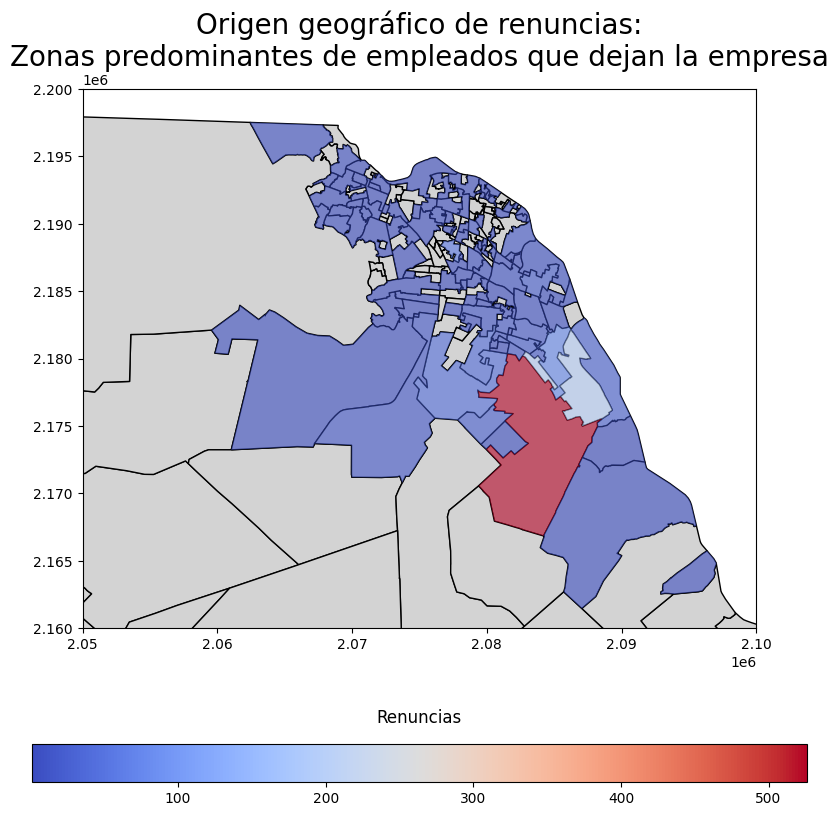

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Cargargando el shapefile de chihuahua y datos
gdf_estado = gpd.read_file('Datos/CP_08Chih_v9.shp')
df_empleados = pd.read_excel('sample_data/bosch_aic_datathon.xlsx')
# Ajustando los nombres de las columnas
gdf_estado = gdf_estado.rename(columns={'d_codigo': 'CodigoPostal'})
df_empleados = df_empleados.rename(columns={'CODIGO POSTAL': 'CodigoPostal'})
# Cambiando el tipo
df_empleados['CodigoPostal'] = df_empleados['CodigoPostal'].astype(str)
# Se limpian datos nulos y Cp no pertenecientes a la ciudad
merged_data = gdf_estado.merge(df_empleados, on='CodigoPostal')
#Agrupando y ordenando
empleados_por_cp = merged_data.groupby('CodigoPostal').size().reset_index(name='NumeroDeEmpleados')
empleados_por_cp = empleados_por_cp.sort_values(by='NumeroDeEmpleados', ascending=False)
merged_data_sort = gdf_estado.merge(empleados_por_cp, on='CodigoPostal')

# Mapa base del estado
fig, ax = plt.subplots(figsize=(10, 10))
gdf_estado.plot(ax=ax, color='lightgrey', edgecolor='k')
# Plot
merged_data_sort.plot(ax=ax, column='NumeroDeEmpleados', cmap='coolwarm', legend=True, legend_kwds={'orientation': 'horizontal'}, alpha=0.6, markersize=5)
ax.set_xlim([2.05e6, 2.1e6])
ax.set_ylim([2.16e6, 2.2e6])
plt.title('Origen geográfico de renuncias:\nZonas predominantes de empleados que dejan la empresa', fontsize=20, loc='center')
plt.text(2.075e6, 2.153e6, 'Renuncias', fontsize=12, ha='center')
plt.show()



**El mapeo nos proporcionó la capacidad de identificar áreas con un índice más elevado de abandono laboral, permitiéndonos destacar las 10 zonas principales donde este índice es más pronunciado. Esta herramienta ha sido fundamental para localizar de manera efectiva los focos de atención relacionados con la retención de empleados.**

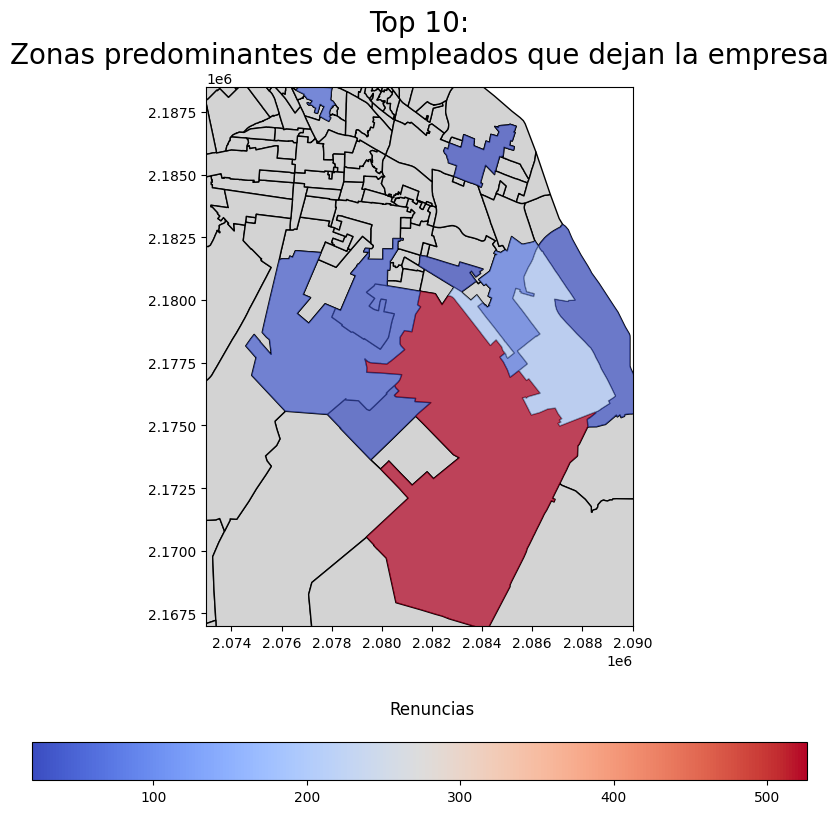

In [ ]:
import tabulate

# Obtener las primeras 10 filas de la tabla de empleados_por_cp
primeras_10_filas = empleados_por_cp.head(10)
tabla_primeras_10_filas = tabulate.tabulate(primeras_10_filas, headers='keys', tablefmt='plane', showindex=False)
# Ordenar y obtener las primeras 10 filas del DataFrame
merged_data_sort = merged_data_sort.sort_values('NumeroDeEmpleados', ascending=False).head(10)
fig, ax = plt.subplots(figsize=(10, 10))
gdf_estado.plot(ax=ax, color='lightgrey', edgecolor='k')
merged_data_sort.plot(ax=ax, column='NumeroDeEmpleados', cmap='coolwarm', legend=True, legend_kwds={'orientation': 'horizontal'}, alpha=0.7, markersize=5)
ax.set_xlim([2.073e6, 2.09e6])
ax.set_ylim([2.167e6, 2.1885e6])
plt.title('Top 10:\nZonas predominantes de empleados que dejan la empresa', fontsize=20, loc='center')
plt.text(2.082e6, 2.1635e6, 'Renuncias', fontsize=12, ha='center')
plt.show()

#print(primeras_10_filas)

**Una vez localizadas las zonas con mayor índice de abandono laboral, se procedió a identificar los principales motivos que se presentaron al momento de darse la respectiva renuncia o despido del empleado.**

In [ ]:
def crear_tabla_df(df, conn):
    df = resultado_df
    nombre_tabla = "Tabla_Top10CP"
    df.to_sql(nombre_tabla, conn, index=False, if_exists='replace')
conn = sqlite3.connect('DB_RETO.db')
codigos_postales = primeras_10_filas['CodigoPostal'].tolist()
codigos_postales_str = ', '.join(map(str, codigos_postales))
query = f"SELECT Posición, Area, `Á.liq.`, `Grupo de personal`, `CODIGO POSTAL`, `Motivo de la RENUNCIA`, Banda, Baja, ReglaPHT, `Alta`, `Antigüedad`, `Clave de sexo`, `Edad del empleado` FROM Tabla_General WHERE `CODIGO POSTAL` IN ({codigos_postales_str});"
resultado_df = pd.read_sql_query(query, conn)
conn.close()

#print(resultado_df)

conn = sqlite3.connect('DB_RETO.db')

if "Tabla_Top10CP" not in pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)["name"].tolist():
    crear_tabla_df(resultado_df, conn)
conn.close()

In [ ]:
#resultado_df.info()

In [ ]:
import plotly.graph_objects as go
import plotly.express as px
conteo_motivos = resultado_df['Motivo de la RENUNCIA'].value_counts().head(8).reset_index(name='Count')
colores_set3 = px.colors.qualitative.Set3
fig = go.Figure()

fig.add_trace(go.Bar(
    y=conteo_motivos['index'],
    x=conteo_motivos['Count'],
    orientation='h',
    marker=dict(color=colores_set3[:8])
))
fig.update_layout(
    title='Top 8 Motivos de Renuncia/Despido para las zonas seleccionadas',
    xaxis_title='Número abandonos laborales',
    yaxis_title='Motivo de la Renuncia'
)
fig.show()


**En este punto, se decidió solo analizar los principales motivos de renuncia presentados por los empleados analizados. Para ello, se realizaron algunos filtros adicionales**

In [ ]:
filtro_motivos = resultado_df[resultado_df["Motivo de la RENUNCIA"].isin(conteo_motivos["index"])]
#filtro_motivos.info()

In [ ]:
filtro_motivos[["Banda"]].value_counts()

Banda
DO       707
DNO      219
E3        24
E4        12
SL1        1
dtype: int64

**A continuación, fue posible observar que en la zona analizada se encuentran dos bandas salariales con una mayor frecuencia de despido/renuncia en comparación con el resto, siendo estas DO y DNO. Podemos suponer que las bandas con menor frecuencia corresponden a puestos de mayor prestigio dentro de la empresa, mientras que las que tienen una mayor frecuencia corresponden a puestos de menor prestigio. Primeramente, se procedió con el análisis hacia los puestos de menor nivel.**

In [ ]:

filtro_e4 = filtro_motivos[filtro_motivos["Banda"].isin(["DO", "DNO"])]
# Columnas de interés
columnas_interes2 = ["Banda", "Posición"]
conteo_ocurrencias2 = filtro_e4[columnas_interes2].value_counts().reset_index(name='Count').head(7)

fig = px.bar(conteo_ocurrencias2, x='Posición', y='Count', color='Posición',
             color_discrete_sequence=px.colors.qualitative.Set3,
             title='Histograma de renuncias/despidos de las distintas posiciones correspondientes a las bandas salariales DO y DNO.',
             labels={'Count': 'Número de renuncias/despidos', 'Posición': 'Posición de trabajo'})
fig.show()



**Desde aquí, podemos observar que para las bandas salariales DO y DNO, hay puestos específicos con un alto índice de renuncia/despido en comparación con el resto.**



In [ ]:
filtro_motivos_banda_cp_pos = filtro_e4[filtro_e4["Posición"].isin(conteo_ocurrencias2["Posición"])]
#filtro_motivos_banda_cp_pos.info()

**Después de clasificar los puestos de trabajo por niveles de prestigio y localizar las principales posiciones de renuncia, se llevó a cabo la identificación de las diferencias entre los motivos de renuncia para los distintos niveles de prestigio de cada puesto laboral.**

In [ ]:
import plotly.graph_objects as go
import plotly.express as px
conteo_motivos = filtro_motivos_banda_cp_pos['Motivo de la RENUNCIA'].value_counts().reset_index(name='Count')
colores_set3 = px.colors.qualitative.Set3
fig = go.Figure()

fig.add_trace(go.Bar(
    y=conteo_motivos['index'],
    x=conteo_motivos['Count'],
    orientation='h',
    marker=dict(color=colores_set3[4:])
))
fig.update_layout(
    title='Motivos de Renuncia para puestos de Menor nivel en la empresa para las zonas seleccionadas',
    xaxis_title='Número abandonos laborales',
    yaxis_title='Motivo de la Renuncia'
)
fig.show()

**Se puede observar claramente que, para puestos de menor nivel jerárquico, la proporción de empleados que optan por abandonar la empresa sin proporcionar una justificación específica es significativamente alta. Este fenómeno podría deberse a la percepción de que estos roles no son críticos o desafiantes, lo que los hace fácilmente transferibles a otras empresas. Esta situación se ve acentuada por la ubicación geográfica de los empleados, quienes se encuentran en estrecha proximidad a una zona industrial. La accesibilidad a otras oportunidades laborales en el área facilita la decisión de cambiar de empleo. Además, destaca un porcentaje considerable de empleados de nivel inferior que busca activamente una transferencia a otra planta. Este comportamiento podría sugerir un deseo de variación en el entorno laboral, posiblemente impulsado por factores como la comodidad geográfica o aspiraciones personales. Esto cobra sentido si suponemos que la planta de la cual se proporcionaron estos datos no es la planta localizada en el Parque Industrial Río Bravo, la cual se encuentra mucho más cerca de su zona que el resto de plantas.**

#Continuando con el analisis a puestos de alto prestigio dentro de la empresa.

**Siguiendo una metodología similar a la realizada previamente, se tomaron en cuenta el resto de bandas salariales presentes en nuestra muestra de datos.**

In [ ]:
filtro_prestigio = filtro_motivos[filtro_motivos["Banda"].isin(["E4", "E3","SL1"])]
# Columnas de interés
columnas_interes2 = ["Banda", "Posición"]
conteo_ocurrencias2 = filtro_prestigio[columnas_interes2].value_counts().reset_index(name='Count').head(7)

fig = px.bar(conteo_ocurrencias2, x='Posición', y='Count', color='Posición',
             color_discrete_sequence=px.colors.qualitative.Set3,
             title='Histograma de renuncias/despidos de las distintas posiciones correspondientes a las bandas salariales E3, E4 y SL1',
             labels={'Count': 'Número de renuncias/despidos', 'Posición': 'Posición de trabajo'})
fig.show()




In [ ]:
filtro_motivos_banda_cp_pos_top = filtro_prestigio[filtro_prestigio["Posición"].isin(conteo_ocurrencias2["Posición"])]
#filtro_motivos_banda_cp_pos_top.info()

**En este punto, se aplicaron algunos filtros para determinar los principales motivos de renuncia que se presentaron en los puestos de alto prestigio dentro de la empresa.**

In [ ]:
conteo_motivos = filtro_motivos_banda_cp_pos_top['Motivo de la RENUNCIA'].value_counts().reset_index(name='Count')
colores_set3 = px.colors.qualitative.Set3
fig = go.Figure()

fig.add_trace(go.Bar(
    y=conteo_motivos['index'],
    x=conteo_motivos['Count'],
    orientation='h',
    marker=dict(color=colores_set3[4:])
))
fig.update_layout(
    title='Motivos de renuncia para puestos de alto nivel en la empresa para las zonas seleccionadas',
    xaxis_title='Número abandonos laborales',
    yaxis_title='Motivo de la Renuncia'
)
fig.show()

**En la fase final del análisis, se destaca un notable cambio en los motivos de renuncia entre los empleados de alto nivel a medida que ascendemos en los niveles jerárquicos dentro de la empresa. A diferencia del caso anterior para puestos de menor nivel, este fenómeno no se traduce necesariamente en una alta rotación, sino más bien en una dinámica activa de búsqueda de nuevas oportunidades laborales.**
**Esta observación nos sugiere dos escenarios posibles. Por un lado, la constante demanda de posiciones para personal de alto nivel indica un mercado laboral competitivo, donde otras empresas reconocen y buscan activamente personal con habilidades y experiencia. Por otro lado, es plausible que estos empleados busquen proactivamente cambios en sus carreras, ya sea por desafíos profesionales o para alinearse mejor con sus metas personales.**
**Este cambio, lejos de ser una preocupación, podría considerarse una consecuencia natural en los niveles superiores de la organización. Ser conscientes de este comportamiento permitirá a la empresa adaptar estrategias para respaldar y retener a su talento clave, asegurándose de alinear sus expectativas y aspiraciones con los objetivos del empleado a largo plazo.**


#  Design of predictive Model

In [ ]:
# This get the RAPIDS-Colab install files and test check your GPU.  Run this and the next cell only.
# Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/pip-install.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 400, done.
remote: Counting objects: 100% (131/131), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 400 (delta 95), reused 52 (delta 51), pack-reused 269
Receiving objects: 100% (400/400), 109.76 KiB | 2.07 MiB/s, done.
Resolving deltas: 100% (197/197), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 1.1 MB/s eta 0:00:00
***********************************************************************
Woo! Your instance has the right kind of GPU, a Tesla T4!
We will now install RAPIDS cuDF, cuML, and cuGraph via pip! 
Please stand by, should be quick...
***********************************************************************

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.6/502.6 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 GB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install db-sqlite3


In [ ]:
import numpy as np
import pandas as pd
import sqlite3
from datetime import date
from sklearn.preprocessing import OneHotEncoder
db = sqlite3.connect("RH.db")

#RawData = pd.read_excel('/content/sample_data/bosch_aic_datathon.xlsx')
query = """
  select * from RH
"""
RawData = pd.read_sql_query(query,db)
RawData.info()

In [ ]:
RawData['Antiguedad'].describe()

count     1391.000000
mean      1456.859813
std       1603.886443
min          5.000000
25%        173.000000
50%        974.000000
75%       2133.000000
max      10552.000000
Name: Antiguedad, dtype: float64

In [ ]:
# Number of days employed
UmbralAntiguedad=1000

In [ ]:
# create new variable "Retencion" conditioned to value of Antiguedad column
RawData['Retencion'] = np.where(RawData['Antiguedad'] < UmbralAntiguedad, 1,0)
RawData['Retencion']


0       0
1       0
2       0
3       1
4       0
       ..
1386    0
1387    0
1388    1
1389    0
1390    0
Name: Retencion, Length: 1391, dtype: int64

In [ ]:
#df=data

#df = RawData.drop(columns=['Nacionalidad','¿Cuanto tiempo tiene viviendo en Cd. Juarez?','Baja', 'Alta', 'Años','Meses','Lugar de nacimiento'])
df = RawData.drop(columns=['Nacionalidad','Baja', 'Alta', 'Lugar_nacimiento'])

df.columns





Index(['id', 'Posicion', 'Area', 'Aliq', 'Grupo_personal', 'CODIGO_POSTAL',
       'Motivo_RENUNCIA', 'Banda', 'ReglaPHT', 'Antiguedad', 'Sexo', 'Edad',
       'Estado_Civil', 'Hijos', 'Retencion'],
      dtype='object')

In [ ]:
df_Rename=df
#df_Rename.rename(columns = {'Motivo de la RENUNCIA':'MotivoRenuncia','Grupo de personal':'GpoPersonal','CODIGO POSTAL':'CodigoPostal' ,'Á.liq.':'ALiq', 'Clave de sexo':'Sexo', 'Edad del empleado':'EdadEmpleado','Estado Civil':'EdoCivil' }, inplace = True)
df_Rename.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1391 entries, 0 to 1390
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               1391 non-null   int64 
 1   Posicion         1391 non-null   object
 2   Area             1391 non-null   object
 3   Aliq             1391 non-null   object
 4   Grupo_personal   1391 non-null   object
 5   CODIGO_POSTAL    1391 non-null   int64 
 6   Motivo_RENUNCIA  1391 non-null   object
 7   Banda            1391 non-null   object
 8   ReglaPHT         1391 non-null   object
 9   Antiguedad       1391 non-null   int64 
 10  Sexo             1391 non-null   object
 11  Edad             1391 non-null   int64 
 12  Estado_Civil     1391 non-null   object
 13  Hijos            1391 non-null   int64 
 14  Retencion        1391 non-null   int64 
dtypes: int64(6), object(9)
memory usage: 163.1+ KB


In [ ]:
#data.dropna()
df.info()
df.isnull()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1391 entries, 0 to 1390
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               1391 non-null   int64 
 1   Posicion         1391 non-null   object
 2   Area             1391 non-null   object
 3   Aliq             1391 non-null   object
 4   Grupo_personal   1391 non-null   object
 5   CODIGO_POSTAL    1391 non-null   int64 
 6   Motivo_RENUNCIA  1391 non-null   object
 7   Banda            1391 non-null   object
 8   ReglaPHT         1391 non-null   object
 9   Antiguedad       1391 non-null   int64 
 10  Sexo             1391 non-null   object
 11  Edad             1391 non-null   int64 
 12  Estado_Civil     1391 non-null   object
 13  Hijos            1391 non-null   int64 
 14  Retencion        1391 non-null   int64 
dtypes: int64(6), object(9)
memory usage: 163.1+ KB


,id,Posicion,Area,Aliq,Grupo_personal,CODIGO_POSTAL,Motivo_RENUNCIA,Banda,ReglaPHT,Antiguedad,Sexo,Edad,Estado_Civil,Hijos,Retencion
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1387,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1388,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1389,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_Rename.describe()

,id,CODIGO_POSTAL,Antiguedad,Edad,Hijos,Retencion
count,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000
mean,696.000000,32550.915888,1456.859813,30.948239,1.140187,0.508986
std,401.691424,1748.116747,1603.886443,9.703084,1.304024,0.500099
min,1.000000,3259.000000,5.000000,18.000000,0.000000,0.000000
25%,348.500000,32575.000000,173.000000,24.000000,0.000000,0.000000
50%,696.000000,32575.000000,974.000000,28.000000,1.000000,1.000000
75%,1043.500000,32599.000000,2133.000000,36.000000,2.000000,1.000000
max,1391.000000,75116.000000,10552.000000,67.000000,6.000000,1.000000


In [ ]:
df_Rename=df.dropna()
# To reset the indices
df_Rename = df.reset_index(drop=True)
df_Rename.describe()

,id,CODIGO_POSTAL,Antiguedad,Edad,Hijos,Retencion
count,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000
mean,696.000000,32550.915888,1456.859813,30.948239,1.140187,0.508986
std,401.691424,1748.116747,1603.886443,9.703084,1.304024,0.500099
min,1.000000,3259.000000,5.000000,18.000000,0.000000,0.000000
25%,348.500000,32575.000000,173.000000,24.000000,0.000000,0.000000
50%,696.000000,32575.000000,974.000000,28.000000,1.000000,1.000000
75%,1043.500000,32599.000000,2133.000000,36.000000,2.000000,1.000000
max,1391.000000,75116.000000,10552.000000,67.000000,6.000000,1.000000


In [ ]:
# remove data where CodigoPostal < 30000
# delete all rows with column 'CodigoPostal' has value <3000
df_new = df_Rename.loc[df_Rename['CODIGO_POSTAL'] > 30000]
df_new.describe()

,id,CODIGO_POSTAL,Antiguedad,Edad,Hijos,Retencion
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000
mean,695.452243,32623.567294,1464.282923,30.985528,1.143271,0.505789
std,401.629561,1286.520738,1606.267760,9.707664,1.306041,0.500147
min,1.000000,32050.000000,5.000000,18.000000,0.000000,0.000000
25%,348.250000,32575.000000,173.000000,24.000000,0.000000,0.000000
50%,695.500000,32575.000000,988.000000,28.000000,1.000000,1.000000
75%,1041.750000,32599.000000,2134.000000,36.000000,2.000000,1.000000
max,1391.000000,75116.000000,10552.000000,67.000000,6.000000,1.000000


In [ ]:
df_new['CODIGO_POSTAL'].unique()

array([32520, 32217, 32600, 32575, 32674, 32690, 32576, 32540, 32584,
       32599, 32433, 32696, 32570, 32598, 32150, 32665, 32695, 32410,
       32587, 32697, 32594, 32543, 32583, 32160, 32545, 32100, 32546,
       32563, 32667, 32580, 32240, 32618, 32590, 32573, 32424, 32675,
       32380, 32350, 32500, 32200, 32472, 32668, 32660, 32585, 32553,
       32664, 32107, 32574, 32654, 32699, 32551, 32510, 32422, 32659,
       32389, 32340, 32698, 32471, 32130, 32548, 32560, 32400, 32550,
       32469, 32215, 32720, 32310, 32586, 32190, 32552, 32539, 50180,
       32676, 32250, 32617, 32448, 32425, 32610, 32170, 32110, 32680,
       32220, 32230, 32606, 32536, 45086, 32912, 32742, 32616, 32722,
       32210, 32360, 32687, 32140, 32379, 32330, 32702, 32538, 32670,
       32740, 32264, 32577, 75116, 32662, 32320, 32650, 32300, 32605,
       32450, 32652, 32050, 32647, 32280, 32403, 32180, 32750, 32408,
       32060, 32423, 32159, 32677])

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1382 entries, 0 to 1390
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               1382 non-null   int64 
 1   Posicion         1382 non-null   object
 2   Area             1382 non-null   object
 3   Aliq             1382 non-null   object
 4   Grupo_personal   1382 non-null   object
 5   CODIGO_POSTAL    1382 non-null   int64 
 6   Motivo_RENUNCIA  1382 non-null   object
 7   Banda            1382 non-null   object
 8   ReglaPHT         1382 non-null   object
 9   Antiguedad       1382 non-null   int64 
 10  Sexo             1382 non-null   object
 11  Edad             1382 non-null   int64 
 12  Estado_Civil     1382 non-null   object
 13  Hijos            1382 non-null   int64 
 14  Retencion        1382 non-null   int64 
dtypes: int64(6), object(9)
memory usage: 172.8+ KB


In [ ]:
df_new=df_new.dropna()
# To reset the indices
df_new = df_new.reset_index(drop=True)

In [ ]:
# filtrar los datos que tengan como motivo de renuncia "Vol"

df_Vol = df_new[df_new['Motivo_RENUNCIA'].str.startswith('Vol')]
df_X = df_new[df_new['Motivo_RENUNCIA'].str.startswith('Vol')]
print(df_Vol['Motivo_RENUNCIA'])

0                      Vol-Otro empleo
1                      Vol-Otro empleo
2                      Vol-Otro empleo
3                         Vol-Estudios
4              Vol-Cambio de domicilio
                     ...              
1373           Vol-Cambio de domicilio
1374      Vol-Prob personales y/o fam.
1377    Vol-Transferencia entre planta
1378           Vol-Cambio de domicilio
1379     Vol-No regreso / no dio razón
Name: Motivo_RENUNCIA, Length: 1227, dtype: object


In [ ]:
df_Vol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1227 entries, 0 to 1379
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               1227 non-null   int64 
 1   Posicion         1227 non-null   object
 2   Area             1227 non-null   object
 3   Aliq             1227 non-null   object
 4   Grupo_personal   1227 non-null   object
 5   CODIGO_POSTAL    1227 non-null   int64 
 6   Motivo_RENUNCIA  1227 non-null   object
 7   Banda            1227 non-null   object
 8   ReglaPHT         1227 non-null   object
 9   Antiguedad       1227 non-null   int64 
 10  Sexo             1227 non-null   object
 11  Edad             1227 non-null   int64 
 12  Estado_Civil     1227 non-null   object
 13  Hijos            1227 non-null   int64 
 14  Retencion        1227 non-null   int64 
dtypes: int64(6), object(9)
memory usage: 153.4+ KB


In [ ]:


df_X.isnull().sum()

id                 0
Posicion           0
Area               0
Aliq               0
Grupo_personal     0
CODIGO_POSTAL      0
Motivo_RENUNCIA    0
Banda              0
ReglaPHT           0
Antiguedad         0
Sexo               0
Edad               0
Estado_Civil       0
Hijos              0
Retencion          0
dtype: int64

In [ ]:
df_X['Hijos'].max()

6

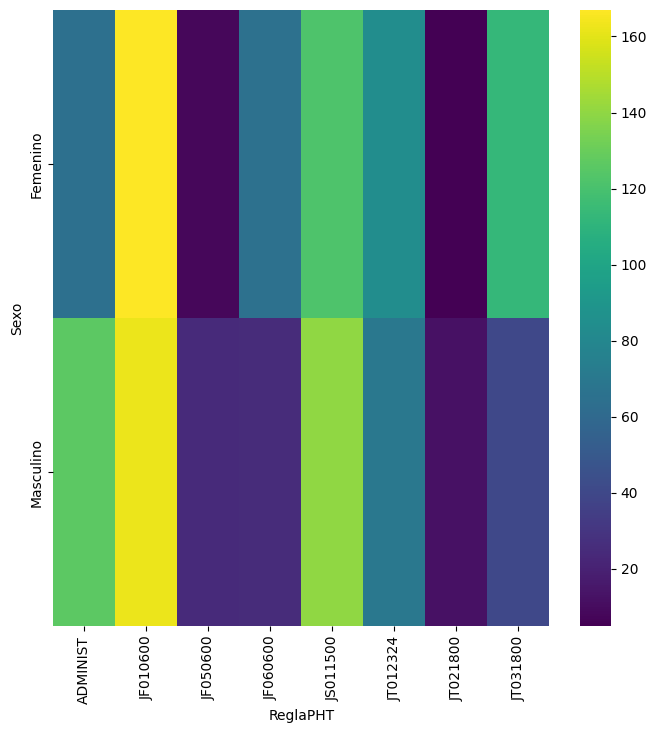

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Sexo'].value_counts()
    for x_label, grp in df_X.groupby('ReglaPHT')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('ReglaPHT')
_ = plt.ylabel('Sexo')

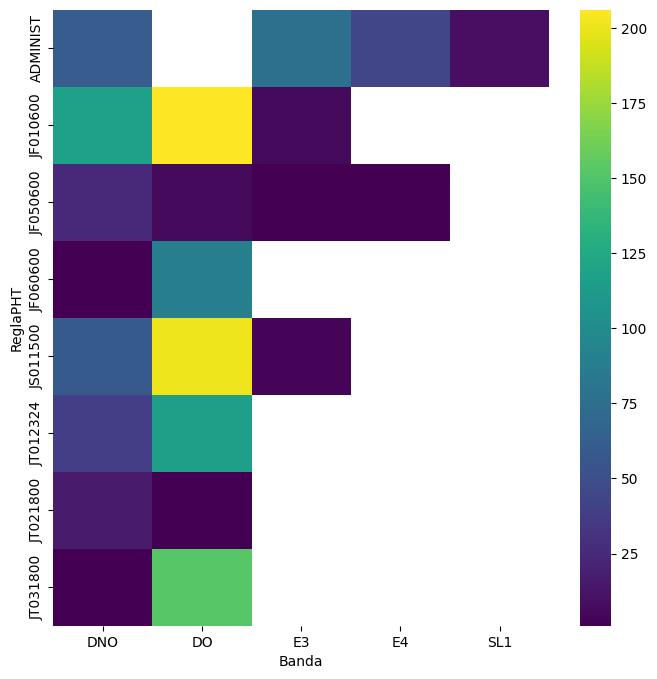

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['ReglaPHT'].value_counts()
    for x_label, grp in df_X.groupby('Banda')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Banda')
_ = plt.ylabel('ReglaPHT')

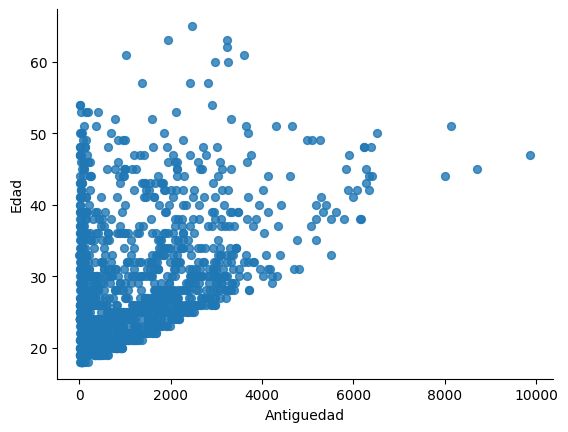

In [ ]:
from matplotlib import pyplot as plt
df_X.plot(kind='scatter', x='Antiguedad', y='Edad', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df_X['Edad'].info()

<class 'pandas.core.series.Series'>
Int64Index: 1227 entries, 0 to 1379
Series name: Edad
Non-Null Count  Dtype
--------------  -----
1227 non-null   int64
dtypes: int64(1)
memory usage: 19.2 KB


In [ ]:
categorical_columns = ['Posicion','Area', 'Aliq','Grupo_personal','Banda','ReglaPHT','CODIGO_POSTAL','Sexo','Estado_Civil']

In [ ]:
# Aplica OneHotEncoder a las columnas categóricas
encoder = OneHotEncoder(sparse=False, drop='first')  # Puedes ajustar los parámetros según tus necesidades
df_toEncode=df_new.drop(columns=['Motivo_RENUNCIA','Antiguedad','Retencion'])
encoded_data = encoder.fit_transform(df_toEncode[categorical_columns])

# Crea un nuevo DataFrame con las variables codificadas
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

# Combina el DataFrame codificado con el DataFrame original
data_encoded = pd.concat([df_toEncode, encoded_df], axis=1)

# Elimina las columnas originales de variables categóricas
data_encoded.drop(categorical_columns, axis=1, inplace=True)

# Muestra las primeras filas del DataFrame resultante
#print(data_encoded.head())
data_encoded.isnull().sum()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


id                     0
Edad                   0
Hijos                  0
Posicion_POS1010       0
Posicion_POS1056       0
                      ..
Estado_Civil_Divorc    0
Estado_Civil_Sep.      0
Estado_Civil_Solter    0
Estado_Civil_U.libr    0
Estado_Civil_Viud.     0
Length: 257, dtype: int64

In [ ]:
print(data_encoded)

        id  Edad  Hijos  Posicion_POS1010  Posicion_POS1056  Posicion_POS1100  \
0        1    31      0               0.0               0.0               0.0   
1        2    25      0               0.0               0.0               0.0   
2        3    23      0               0.0               0.0               0.0   
3        4    18      0               0.0               0.0               0.0   
4        5    26      0               0.0               0.0               0.0   
...    ...   ...    ...               ...               ...               ...   
1377  1387    44      0               0.0               0.0               0.0   
1378  1388    28      0               0.0               0.0               0.0   
1379  1389    21      0               0.0               0.0               0.0   
1380  1390    45      2               0.0               0.0               0.0   
1381  1391    46      4               0.0               0.0               0.0   

      Posicion_POS1111  Pos

In [ ]:
data_encoded=data_encoded.dropna()
# To reset the indices
data_encoded = data_encoded.reset_index(drop=True)
data_encoded.isnull().sum()

id                     0
Edad                   0
Hijos                  0
Posicion_POS1010       0
Posicion_POS1056       0
                      ..
Estado_Civil_Divorc    0
Estado_Civil_Sep.      0
Estado_Civil_Solter    0
Estado_Civil_U.libr    0
Estado_Civil_Viud.     0
Length: 257, dtype: int64

In [ ]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Columns: 257 entries, id to Estado_Civil_Viud.
dtypes: float64(254), int64(3)
memory usage: 2.7 MB


In [ ]:
df_Encoded= data_encoded.copy()
df_Encoded['Retencion']


KeyError: ignored

In [ ]:
#df_Encoded.drop(['Antiguedad','Motivo_RENUNCIA','Retencion'], axis=1, inplace=True)
X=data_encoded
X.columns

Index(['id', 'Edad', 'Hijos', 'Posicion_POS1010', 'Posicion_POS1056',
       'Posicion_POS1100', 'Posicion_POS1111', 'Posicion_POS1116',
       'Posicion_POS1133', 'Posicion_POS1145',
       ...
       'CODIGO_POSTAL_45086', 'CODIGO_POSTAL_50180', 'CODIGO_POSTAL_75116',
       'Sexo_Masculino', 'Estado_Civil_Concu.', 'Estado_Civil_Divorc',
       'Estado_Civil_Sep.', 'Estado_Civil_Solter', 'Estado_Civil_U.libr',
       'Estado_Civil_Viud.'],
      dtype='object', length=257)

In [ ]:
df_Vol

,id,Posicion,Area,Aliq,Grupo_personal,CODIGO_POSTAL,Motivo_RENUNCIA,Banda,ReglaPHT,Antiguedad,Sexo,Edad,Estado_Civil,Hijos,Retencion
0,1,POS514,LOG,S6,Exempt,32520,Vol-Otro empleo,E3,ADMINIST,1656,Femenino,31,Solter,0,0
1,2,POS1745,MFS,S5,Direct,32217,Vol-Otro empleo,DNO,ADMINIST,1993,Masculino,25,Solter,0,0
2,3,POS1230,VS7,S5,Direct,32600,Vol-Otro empleo,DNO,JT012324,1223,Masculino,23,Solter,0,0
3,4,POS1661,MFS,S5,Direct,32575,Vol-Estudios,DO,JT012324,61,Femenino,18,Solter,0,1
4,5,POS1921,MFS,S5,Direct,32575,Vol-Cambio de domicilio,DO,JT012324,2133,Masculino,26,Solter,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1373,1383,POS1323,VS9-ABS,S5,Direct,32598,Vol-Cambio de domicilio,DO,JS011500,3606,Masculino,61,Casad.,4,0
1374,1384,POS1974,MFS,S6,Exempt,32618,Vol-Prob personales y/o fam.,E4,ADMINIST,3243,Masculino,62,Casad.,3,0
1377,1387,POS790,QMM,S6,Exempt,32585,Vol-Transferencia entre planta,E4,ADMINIST,4128,Masculino,44,Casad.,0,0
1378,1388,POS2802,TEF,S5,Direct,32575,Vol-Cambio de domicilio,DNO,JT012324,2547,Masculino,28,Solter,0,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


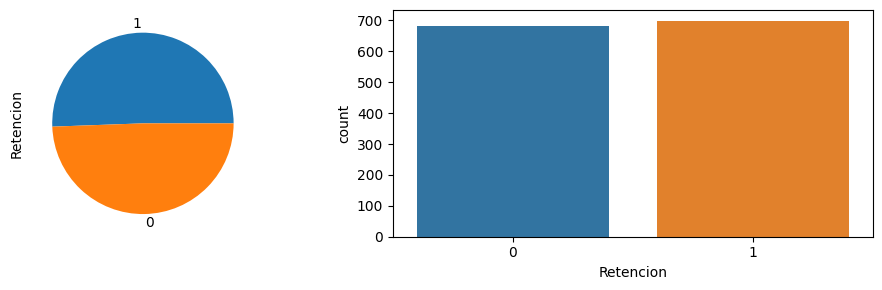

In [ ]:
# cchart for distribution of target variable
fig= plt.figure(figsize=(10,3) )
fig.add_subplot(1,2,1)
a= df_new["Retencion"].value_counts(normalize=True).plot.pie()
fig.add_subplot(1,2,2)
churnchart=sns.countplot(x=df_new["Retencion"])
plt.tight_layout()
plt.show()

In [ ]:
y=df_new['Retencion']


# Model

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
# import the metrics class
from sklearn import metrics
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.metrics import classification_report



## Split Variables

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
X_train.columns

Index(['id', 'Edad', 'Hijos', 'Posicion_POS1010', 'Posicion_POS1056',
       'Posicion_POS1100', 'Posicion_POS1111', 'Posicion_POS1116',
       'Posicion_POS1133', 'Posicion_POS1145',
       ...
       'CODIGO_POSTAL_45086', 'CODIGO_POSTAL_50180', 'CODIGO_POSTAL_75116',
       'Sexo_Masculino', 'Estado_Civil_Concu.', 'Estado_Civil_Divorc',
       'Estado_Civil_Sep.', 'Estado_Civil_Solter', 'Estado_Civil_U.libr',
       'Estado_Civil_Viud.'],
      dtype='object', length=257)

In [ ]:
#get shape of train and test data
print("train size X : ",X_train.shape)
print("train size y : ",y_train.shape)
print("test size X : ",X_test.shape)
print("test size y : ",y_test.shape)

train size X :  (1036, 257)
train size y :  (1036,)
test size X :  (346, 257)
test size y :  (346,)


In [ ]:
X_test.describe()

,id,Edad,Hijos,Posicion_POS1010,Posicion_POS1056,Posicion_POS1100,Posicion_POS1111,Posicion_POS1116,Posicion_POS1133,Posicion_POS1145,...,CODIGO_POSTAL_45086,CODIGO_POSTAL_50180,CODIGO_POSTAL_75116,Sexo_Masculino,Estado_Civil_Concu.,Estado_Civil_Divorc,Estado_Civil_Sep.,Estado_Civil_Solter,Estado_Civil_U.libr,Estado_Civil_Viud.
count,346.000000,346.000000,346.000000,346.00000,346.00000,346.0,346.0,346.0,346.0,346.0,...,346.0,346.00000,346.0,346.000000,346.0,346.000000,346.0,346.000000,346.000000,346.00000
mean,675.754335,31.135838,1.086705,0.00289,0.00289,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00289,0.0,0.485549,0.0,0.014451,0.0,0.540462,0.196532,0.00289
std,379.112855,10.184190,1.320297,0.05376,0.05376,0.0,0.0,0.0,0.0,0.0,...,0.0,0.05376,0.0,0.500515,0.0,0.119513,0.0,0.499082,0.397951,0.05376
min,11.000000,18.000000,0.000000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00000
25%,356.250000,24.000000,0.000000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00000
50%,655.500000,28.000000,1.000000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.00000
75%,981.750000,36.000000,2.000000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,1.000000,0.0,0.000000,0.0,1.000000,0.000000,0.00000
max,1384.000000,65.000000,6.000000,1.00000,1.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,1.00000,0.0,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.00000


# Applying the Model


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

In [ ]:
# importing module
from sklearn.linear_model import LogisticRegression
# creating an object of LinearRegression class
#
# fitting the training data
#as we will add class weights due to class imbalance problem
lr_basemodel =LogisticRegression(random_state=16, max_iter=800,class_weight={0:0.1,1:0.9})
# train model to learn relationships between input and output variables
lr_basemodel.fit(X_train,y_train)


LogisticRegression(class_weight={0: 0.1, 1: 0.9}, max_iter=800, random_state=16)

we have x_test data, which we will use for the prediction of Retention based on labor old info.

In [ ]:
y_prediction =  lr_basemodel.predict(X_test)
y_prediction

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [ ]:
y_prediction=pd.Series(y_prediction)


In [ ]:
y_prediction

0      1
1      1
2      1
3      1
4      1
      ..
341    0
342    1
343    1
344    1
345    1
Length: 346, dtype: int64

In [ ]:
y_test

309     1
741     1
265     1
823     0
778     1
       ..
984     0
135     1
903     0
1032    0
621     1
Name: Retencion, Length: 346, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_prediction)

0.615606936416185

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_prediction)
cnf_matrix

array([[ 33, 133],
       [  0, 180]])

# Confusion Matrix

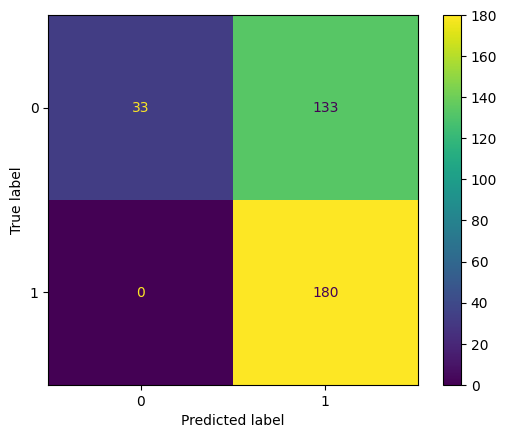

In [ ]:
SVC(random_state=0)
predictions=lr_basemodel.predict(X_test)
cm= confusion_matrix(y_test, predictions, labels=lr_basemodel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_basemodel.classes_)
disp.plot()
plt.show()

In [ ]:
target_names = ['Empleado No retenido', 'Empleado Retenido']
print(classification_report(y_test, y_prediction, target_names=target_names))

                      precision    recall  f1-score   support

Empleado No retenido       1.00      0.20      0.33       166
   Empleado Retenido       0.58      1.00      0.73       180

            accuracy                           0.62       346
           macro avg       0.79      0.60      0.53       346
        weighted avg       0.78      0.62      0.54       346



# Correlation Matrix From Base Data for Model After encoding

In [ ]:
# Find the pearson correlations matrix
corr = data_encoded.corr(method = 'pearson')
corr

,id,Edad,Hijos,Posicion_POS1010,Posicion_POS1056,Posicion_POS1100,Posicion_POS1111,Posicion_POS1116,Posicion_POS1133,Posicion_POS1145,...,CODIGO_POSTAL_45086,CODIGO_POSTAL_50180,CODIGO_POSTAL_75116,Sexo_Masculino,Estado_Civil_Concu.,Estado_Civil_Divorc,Estado_Civil_Sep.,Estado_Civil_Solter,Estado_Civil_U.libr,Estado_Civil_Viud.
id,1.000000,0.066305,0.044173,-0.021899,-0.014709,0.015184,0.001488,-0.023154,0.020948,0.009152,...,0.000774,-0.014709,0.018670,0.041723,-0.005593,0.049958,-0.002577,-0.064578,-0.018401,-0.011445
Edad,0.066305,1.000000,0.630291,0.039287,0.008359,-0.002733,-0.004438,0.019451,-0.002733,0.027770,...,-0.011052,0.008359,-0.019371,0.005799,0.002813,0.172747,-0.027690,-0.505227,0.076049,0.099443
Hijos,0.044173,0.630291,1.000000,0.010402,-0.023564,0.017658,-0.024106,-0.023564,0.017658,0.017658,...,-0.023564,-0.023564,-0.023564,-0.160576,-0.002953,0.141571,-0.023564,-0.574644,0.237720,0.094928
Posicion_POS1010,-0.021899,0.039287,0.010402,1.000000,-0.001024,-0.001024,-0.002514,-0.001024,-0.001024,-0.001024,...,-0.001024,-0.001024,-0.001024,0.000441,-0.001024,-0.005475,-0.001024,-0.002152,-0.019361,-0.002294
Posicion_POS1056,-0.014709,0.008359,-0.023564,-0.001024,1.000000,-0.000724,-0.001777,-0.000724,-0.000724,-0.000724,...,-0.000724,1.000000,-0.000724,0.027223,-0.000724,-0.003870,-0.000724,0.025431,-0.013686,-0.001622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Estado_Civil_Divorc,0.049958,0.172747,0.141571,-0.005475,-0.003870,-0.003870,-0.009496,-0.003870,-0.003870,-0.003870,...,-0.003870,-0.003870,-0.003870,-0.049697,-0.003870,1.000000,-0.003870,-0.152162,-0.073135,-0.008665
Estado_Civil_Sep.,-0.002577,-0.027690,-0.023564,-0.001024,-0.000724,-0.000724,-0.001777,-0.000724,-0.000724,-0.000724,...,-0.000724,-0.000724,-0.000724,-0.026600,-0.000724,-0.003870,1.000000,-0.028473,-0.013686,-0.001622
Estado_Civil_Solter,-0.064578,-0.505227,-0.574644,-0.002152,0.025431,-0.028473,0.018314,-0.028473,-0.028473,-0.028473,...,0.025431,0.025431,0.025431,0.000655,-0.028473,-0.152162,-0.028473,1.000000,-0.538140,-0.063761
Estado_Civil_U.libr,-0.018401,0.076049,0.237720,-0.019361,-0.013686,-0.013686,-0.006346,-0.013686,-0.013686,0.052911,...,-0.013686,-0.013686,-0.013686,-0.044256,-0.013686,-0.073135,-0.013686,-0.538140,1.000000,-0.030646


## Model RFC

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
clf=RandomForestClassifier(random_state=42)
clf.fit(X_train,y_train)
y_predRFC=clf.predict(X_test)

print(classification_report(y_test,y_predRFC,target_names=target_names))


                      precision    recall  f1-score   support

Empleado No retenido       0.74      0.79      0.77       166
   Empleado Retenido       0.79      0.75      0.77       180

            accuracy                           0.77       346
           macro avg       0.77      0.77      0.77       346
        weighted avg       0.77      0.77      0.77       346



In [ ]:
SVC(random_state=0)
predictions=lr_basemodel.predict(X_test)
cm= confusion_matrix(y_test, predictions, labels=lr_basemodel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_basemodel.classes_)
disp.plot()
plt.show()

In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
!pip install gradio

## Update features names for UI


In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
!pip install gradio

In [ ]:
from numpy.core.multiarray import concatenate
import gradio as gr
import pandas as pd
import numpy as np


def predict(Posicion, Area, Aliq, Grupo_personal, Codigo_postal, Banda,
       ReglaPHT, Sexo, Edad, Estado_civil,
        hijos):


    # Crea un DataFrame con los valores de entrada
    input_data_categ = pd.DataFrame([[
        Posicion, Area, Aliq, Grupo_personal, Codigo_postal, Banda,
       ReglaPHT, Sexo, Estado_civil]], columns=[
        'Posicion', 'Area', 'Aliq', 'Grupo_personal', 'CODIGO_POSTAL', 'Banda','ReglaPHT', 'Sexo',
        'Estado_Civil'])
    input_data_encoded=encoder.transform(input_data_categ)
    input_data_num= pd.DataFrame([[Edad, hijos]], columns=['Edad','Hijos'])
    input_data=pd.concat([input_data_num, input_data_encoded], axis=1)
    input_data.drop(categorical_columns, axis=1, inplace=True)


    prediction = clf.predict(input_data)


    # create a dictionary of final result obtained from catalog
    clasificador_dicc={0:"Empleado Retenido",1:"Empleado No Retenido"}

    # return the prediction code with the dictionary value.
    return f"{prediction[0]},{clasificador_dicc[prediction[0]]}"

gr.Row
inputs = [
    gr.Slider(minimum=0, maximum=120, value=30, label='Edad'),
    gr.Slider(minimum=0, maximum=12, value=0, label='Hijos'),
    gr.Radio(choices=['POS514', 'POS1745', 'POS1230', 'POS1661', 'POS1921', 'POS2803',
       'POS538', 'POS1380', 'POS2094', 'POS2003', 'POS347', 'POS1376',
       'POS1323', 'POS2939', 'POS581', 'POS2384', 'POS2553', 'POS2802',
       'POS2046', 'POS2856', 'POS1683', 'POS750', 'POS907', 'POS2745',
       'POS1884', 'POS2858', 'POS1559', 'POS2076', 'POS841', 'POS2167',
       'POS2817', 'POS1373', 'POS1788', 'POS343', 'POS2456', 'POS1111',
       'POS2718', 'POS1227', 'POS2062', 'POS1116', 'POS251', 'POS1010',
       'POS1181', 'POS2988', 'POS1056', 'POS1974', 'POS213', 'POS1365',
       'POS2224', 'POS1845', 'POS1203', 'POS2338', 'POS1439', 'POS500',
       'POS1783', 'POS1702', 'POS1748', 'POS2622', 'POS1488', 'POS780',
       'POS1210', 'POS124', 'POS1667', 'POS1410', 'POS454', 'POS96',
       'POS698', 'POS139', 'POS2915', 'POS1819', 'POS2913', 'POS1448',
       'POS2497', 'POS1145', 'POS2848', 'POS2698', 'POS723', 'POS2847',
       'POS1657', 'POS1100', 'POS2756', 'POS60', 'POS2567', 'POS101',
       'POS1133', 'POS2597', 'POS1520', 'POS706', 'POS1359', 'POS2446',
       'POS790'], label='Posicion'),
    gr.Radio(choices=['LOG', 'MFS', 'VS7', 'VS1', 'VS9-ABS', 'TEF', 'VS4', 'VS5',
       'VS1-HOUS', 'QMM', 'CTG', 'DBE', 'HRL', 'HSE', 'Admin MSE2',
       'Admin MSE1'], label='Area'),
    gr.Radio(choices=['S6', 'S5'], label='Aliq'),
    gr.Radio(choices=['Exempt', 'Direct', 'Indirect', 'Managers', 'Non-Exempt'], label='Grupo_personal'),
    gr.Slider(minimum=30000, maximum=80000, value=32000, label='CODIGO_POSTAL'),
    gr.Radio(choices=['E3', 'DNO', 'DO', 'E4', 'SL1'], label='Banda'),
    gr.Radio(choices=['ADMINIST', 'JT012324', 'JF050600', 'JF060600', 'JS011500',
       'JF010600', 'JT031800', 'JT021800'], label='ReglaPHT'),
    gr.Radio(choices=['Femenino', 'Masculino'], label='Sexo'),
    gr.Radio(choices=['Solter', 'Casad.', 'U.libr', 'Divorc', 'Viud.', 'Concu.'], label='Estado_Civil')
    ]

# Crear componente de salida para Gradio
outputs = gr.Textbox(label="Predicción")

# Crear la interfaz de Gradio
demo = gr.Interface(fn=predict, inputs=inputs, outputs=outputs)

# Ejecutar la aplicación web
if __name__ == "__main__":
    demo.launch(show_api=False,debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://8e0848c2f5001605a4.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/gradio/queueing.py", line 456, in call_prediction
    output = await route_utils.call_process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/route_utils.py", line 232, in call_process_api
    output = await app.get_blocks().process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1522, in process_api
    result = await self.call_function(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1144, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/usr/local/lib/python3.10/dist-packages/anyio/to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 877, in run_sync_in_worker_thread
    return await future
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 807, in run
    re

Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://8e0848c2f5001605a4.gradio.live


In [ ]:
X_test